# Tarea 2: Clasificación

Felipe Bravo, Hernán Sarmiento, Aymé Arango, Alison Fernandez, Cinthia Mabel Sánchez, Juan Pablo Silva

**Octubre 2020**

## ============= Declaración de compromiso ético =============

Nosotros ****AGREGUEN SUS NOMBRES**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos o tres personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalice el laboratorio, **genere un archivo HTML** usando jupyter (ver tutorial 2) y súbalo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura de la tarea

Esta tarea está conformada por preguntas prácticas (donde se requiere completar código) intercaladas con preguntas de interpretación de resultados y descripción de conceptos teóricos vistos en clases. Las preguntas se dividen en 5 partes: 

1. Explorar los datos.
2. Entrenar un clasificador de 3 maneras: 
    1) Entrenando/Testeando con los mismos datos,
    2) Dividiendo el dataset en una parte para entrenar y otra para testear, y
    3) Usando cross-validation. Veremos accuracy, precision y recall para luego analizar los resultados. 
3. Comparar clasificadores con ciertos *baselines* o clasificadores base.
4. Seleccionar hiperparámetros.
5. Trabajar con clases desbalanceadas.

# Parte 1: Explorar los datos

Usaremos el **Wine Dataset**, que viene en **scikit-learn**. Ejecutaremos la siguiente línea de código para importar la librería que nos permitirá cargarlo.

In [4]:
from sklearn.datasets import load_wine

## Pregunta 1.1

Cargue los datos e indique lo siguiente:
* Tamaño del dataset (cantidad de instancias y atributos). 
* ¿Cuántas clases hay y cuáles son sus nombres?
* ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.

In [5]:
import pandas as pd

In [6]:
# Esto nos ayuda a ver la forma de los datos, que vemos que viene en forma de diccionario
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
# Tenemos que:
# n de instancias = 178
# n de atributos = 13
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
data.shape

(178, 13)

In [9]:
# Tenemos que hay 3 clases llamadas class_0, class_1 y class_2
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [6]:
# De las cuales 59 instancias son de clase_0, 71 de clase_1 y 48 de clase_2
target = pd.Series(wine['target'])
g = target.groupby(target).size()
g

0    59
1    71
2    48
dtype: int64

## Pregunta 1.2

Explique:
- ¿Qué hacen las siguientes líneas de código?
- ¿Qué nos muestra este gráfico? 
- ¿Cuáles son las principales observaciones que puede obtener sobre los datos a partir de los gráficos?

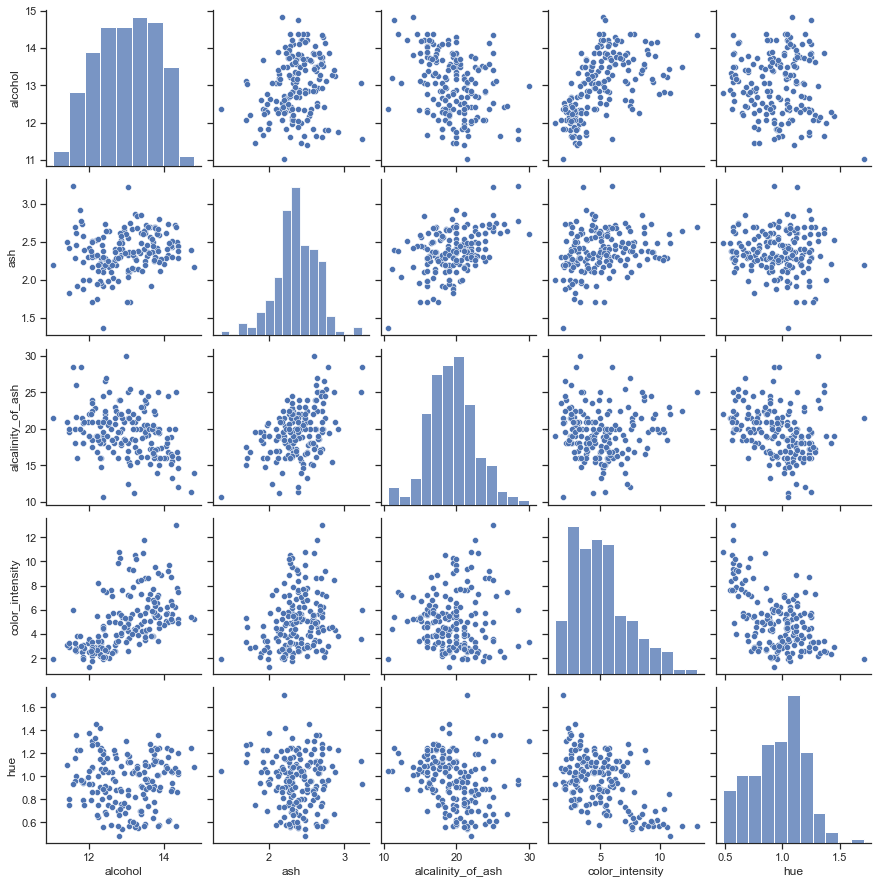

In [7]:
## EJECUTAR ESTE BLOQUE

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd

wine = load_wine()
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

data['target'] = wine['target']
data['class'] = data['target'].map(lambda ind: wine['target_names'][ind])

g = sns.pairplot(data.iloc[:, [0,2,3,9,10]]) # Parametro kind="reg" agrega una recta
plt.show()

In [8]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,class_2


En primer lugar se importan las librerias, luego se carga el dataset con los datos de wine y se pasa a un Dataframe con sus respectivos atributos (feature_names), adicionalmente se crean dos columnas, una que contiene los target de cada instancia (target) y otra que se construye a partir de un mapeo sobre la anterior (class), donde se agrega la clase de la instancia basado en el target que posee, por ejemplo, si el target es 1 se busca en el indice 1 de la lista que contiene los nombres de las clases, el cual corresponde justamente a la clase_1. Finalmente, se hace un pairplot de los atributos: alcohol, ash, alcalinity_of_ash, color_intensity y hue. 

Este grafico nos muestra como se relacionan todos los pares de variables designados y ver si existe cierta correlacion entre ellos, ademas, para el par que tiene el mismo atributo (ej: (alcohol, alcohol)) nos muestra la distribucion de este en forma de histograma.

En general son pocas las correlaciones lineales que se pueden observar, las mas cercana que uno puede notar son de forma positiva (ash, color_intensity), (alcohol, color_intensity) y de forma negativa (color_intensity, hue). En la gran mayoria se tiene un cumulo "concetrado" de datos en cierto punto.
Una pequeña observacion que se puede hacer es la existencia de un outlier en "hue" por sobre los 1.5 que tambien se ve reflejado al hacer la comparacion con otros atributos como este dato se aleja bastante del resto, situacion que se repite en otros atributos.

# Parte 2: Entrenar/testear clasificadores

En esta parte useremos el clasificador **Decision Tree**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas. 

## Pregunta 2.1

Usando el siguiente código, complete lo que falta para cargar los datos, entrenar y hacer una predicción empleando el clasificador. Luego, muestre las métricas de **accuracy**, **precision**, **recall** y **f1-score**.

In [ ]:
## RESPUESTA PREGUNTA 2.1

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()

X = wine.data      ## datos, caracteristicas o features 
y = wine.target    ## clase para cada instancia anterior

# .... COMPLETE ACA


## Pregunta 2.2

Explique cada una de las líneas de código de la pregunta 2.1 (omita las líneas que cargan librerías).

## Pregunta 2.3

De acuerdo a las métricas obtenidas: 

1. ¿Qué opina sobre las predicciones? 
2. ¿Recomendaría utilizar este clasificador en una aplicacion para clasificar vinos? ¿Por qué?
3. ¿Qué problema puede identificar?

## CLASIFICADOR 2

Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (***training set***) y 30% para testear (***testing set***). Use la función ***train_test_split()*** de *sklearn* y utilice las variables `X_train, X_test, y_train, y_test`.

## Pregunta 2.4

Escriba el código necesario para dividir los datos, entrenar el modelo e indicar el **accuracy**, **precision** y **recall** del clasificador. 
Entrene usando el ***training set*** y pruebe sobre el ***testing set***, en base a la división 70%-30%, respectivamente 

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**

In [ ]:
### Respuesta a pregunta 2.4
# ...
# Recuerde usar las variables X_train, X_test, y_train, y_test



## Pregunta 2.5

Según el resultado obtenido en la pregunta anterior, responda lo siguiente:

1. ¿Cuál clasificador tiene peores resultados? ¿Por qué?
2. ¿Considera este clasificador mejor o peor que el anterior? ¿Por qué? (pregunta sobre el modelo, no sobre el método/algoritmo)
3. ¿Cuál de las dos formas de entrenar el clasificador prefiere? 

## Pregunta 2.6

El siguiente código genera una matriz de confusión de los resultados de clasificación de la pregunta 2.4. Ejecute el bloque completo para visualizar el gráfico. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa.

In [ ]:
## EJECUTAR ESTE BLOQUE

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred) 

# Only use the labels that appear in the data
classes = wine.target_names[unique_labels(y_test, y_pred)]

df = pd.DataFrame(cm, index = classes, columns = classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

## CLASIFICADOR 3

Para este clasificador utilizaremos Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear. 

In [ ]:
## EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

#Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar la 
#funcion np.mean la cual retorna el promedio. Esto mostraría una lista con el resultado de cada fold

## Pregunta 2.7

- ¿Qué indican los resultados obtenidos? 

- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 2.4 y comente en qué difieren y por qué.

- ¿Qué beneficios tiene emplear cross-validation?

# Parte 3: Comparar clasificadores

Una de las principales tareas en enfoques supervisados es evaluar diferentes clasificadores y encontrar el mejor rendimiento de alguno de ellos. Por ejemplo, si tenemos dos (o más) clasificadores y queremos compararlos entre sí, nos interesa responder: *¿Cuál de los clasificadores es el mejor?* 
Para responder esta pregunta, no existe una única solución. 

Lo que haremos a continuación será ejecutar diferentes clasificadores y compararlos en base a las métricas de Precision, Recall y F1-score.

### PREGUNTA 3.1


Para realizar la evaluación de distintos clasificadores, vamos a crear la función `run_classifier()`, la cual evalúa un clasificador `clf` recibido como parámetro, un dataset `X,y` (features y target) y un número de tests llamado `num_test`. Esta función almacena y retorna los valores de precision, recall y f1-score en la variable `metrics` además de los resultados de predicción.

En base a lo anterior, incluya las sentencias que ajusten el modelo junto a su correspondiente predicción sobre los datos. **No use cross-validation ni tampoco el parámetro `random_state`.**



In [4]:
### COMPLETAR ESTE CÓDIGO

## run_classifier recibe un clasificador y un dataset (X, y)
## y opcionalmente la cantidad de resultados que se quiere obtener del clasificador

from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np

def run_classifier(clf, X, y, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}
    
    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
        ### INICIO COMPLETAR ACÁ 
        
        #### TIP: en base a los set de entrenamiento, genere la variable 'predictions' 
        #### que contiene las predicciones del modelo
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        
        ### FIN COMPLETAR ACÁ
        
        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions)) 
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    
    return metrics

Luego de completar el código anterior, ejecute el siguiente bloque para comparar distintos clasificadores. 
Usaremos un **dataset de cáncer de mamas** para evaluar. La información del dataset se puede encontrar en el siguiente link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [5]:
## ejecutar este código

from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # support vector machine classifier

bc = load_breast_cancer()    # dataset cancer de mamas
X = bc.data
y = bc.target

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
c4 = ("Support Vector Machines", SVC())

classifiers = [c0, c1, c2, c3, c4]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name) 
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")  

----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.6280346482782424
Recall promedio: 0.628423042053552
F1-score promedio: 0.6267635593319959
----------------


----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.9445349637898726
Recall promedio: 0.945762329396089
F1-score promedio: 0.9448157820547253
----------------


----------------
Resultados para clasificador:  Gaussian Naive Bayes
Precision promedio: 0.9342950050587544
Recall promedio: 0.9683965948005507
F1-score promedio: 0.950812090864123
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.9320978295516218
Recall promedio: 0.9647403267807174
F1-score promedio: 0.9479290770532152
----------------


----------------
Resultados para clasificador:  Support Vector Machines
Precision promedio: 0.8987627801908161
Recall promedio: 0.9774710124554038
F1-score promedio: 0.9361554134606714
----------------




## Pregunta 3.2


Explique cómo escoge un árbol de decisión el atributo raíz.



Se busca el atributo que produce los nodos mas "puros" posibles, y se aplica de forma recursiva para las ramas. Un criterio utilizado para medir esta pureza es *information gain* que entrega una valor correspondiente a la pureza promedio de cada subconjunto que genera cada atributo, para ello se utiliza la informacion en bits (Entropia) que ocuparia cada subconjuto de forma de saber quien me da la mayor ganancia de necesitar menos bits para codificar, definiendo de esta forma el *information gain* como: informacion antes del split - informacion despues del split. El atributo que maximice este valor es selecionado como atributo raiz.

## Pregunta 3.3

Explique el problema de optimización que resuelve una SVM lineal.



El problema de optimizacion consiste en encontrar un hiperplano que maximice el margen *b* en un problema de clasificacion binaria. Donde este margen se define a partir de la distancia del punto positivo y negativo mas cercanos al hiperplano, donde los positivos. Con lo cual se tiene el hiperplano mas generalizable que divide en dos regiones para clasificar nuevos datos.

## Pregunta 3.4

Analizando los resultados obtenidos de cada clasificador, y basándose en las métricas calculadas. ¿Cuál es el mejor clasificador? ¿Qué métricas observó para tomar esa decisión y por qué? considerando el problema que aborda. Fundamente su respuesta.

## Pregunta 3.5

Un consultor en minería de datos tiene la siguiente estrategia al momento de enfrentar un problema de clasificación: probar todos los modelos posibles hasta encontrar uno que tenga cero error de entrenamiento. Comente la estrategia del consultor y proponga una estrategia alternativa.

## Pregunta 3.6

El mismo consultor siempre usa la misma métrica para evaluar un modelo: accuracy. Comente la estrategia del consultor y proponga una estrategia alternativa.

# Parte 4: Seleccionar hiperparámetros

Los hiperparámetros son parámetros que no se aprenden directamente dentro de los estimadores. En scikit-learn se pasan como argumentos al constructor de las clases, por ejemplo cuál kernel usar para Support Vector Classifier, o qué criterio para Decision Tree, etc. Es posible y recomendable buscar en el espacio de hiperparámetros la mejor alternativa.

Tenga en cuenta que es común que un pequeño subconjunto de esos parámetros pueda tener un gran impacto en el rendimiento predictivo o de cálculo del modelo, mientras que otros pueden dejar sus valores predeterminados. Se recomienda leer la documentación de la clase de estimador para obtener una mejor comprensión de su comportamiento esperado.

## GridSearchCV

Una alternativa para seleccionar hiperparámetros es GridSearchCV, la cual considera exhaustivamente todas las combinaciones de parámetros. GridSearchCV recibe un *estimador*, recibe *param_grid* (un diccionario o una lista de diccionarios con los nombres de los parametros a probar como keys y una lista de los valores a probar), *scoring* una o varias funciones de puntuación (score) para evaluar cada combinación de parametros (opciones válidas: https://scikit-learn.org/stable/modules/model_evaluation.html) y *cv* una extrategia para hacer validación cruzada.

El siguiente código muestra cómo seleccionar el número de vecinos y qué pesos otorgar a los vecinos en un clasificador KNN. 
 


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

#Configure tuned_parameters
tuned_parameters = {'n_neighbors': [1, 3, 5, 10], 
                    'weights': ['uniform','distance']}

#set scoring metric
score = 'precision' 

#Construir el clf con GridSearch
clf = GridSearchCV(KNeighborsClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=5,
                   scoring=score)

#Entrenar clf
clf.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)
 
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))

## Pregunta 4.1

*  a) Realice este mismo proceso para un clasificador DecisionTree y los parametros criterion=['gini','entropy'], max_depth=[2,5,10] y tomando como scoring metric 'f1'. Use cv=6
*  b) ¿Qué puede decir de los resultados, con cuáles parámetros los obtuvo (revise que su respuesta concuerde con lo que imprime)? ¿Cuál considera que es la principal ventaja de aplicar GridSearchCV? ¿Considera que es necesario seguir explorando los parámetros?

In [ ]:
## RESPUESTA A PREGUNTA 4.1 a)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

## COMPLETE ACÁ

##### FIN COMPLETE ACÁ
print("Mejor combinación de parámetros:")
print(clf.best_params_)
 
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

# Parte 5: Trabajar con clases desbalanceadas

Para mejorar el rendimiento de un clasificador sobre clases desbalanceadas existen varias técnicas. En esta parte, veremos cómo tratar con este problema usando (sub/over) sampling de las clases.

(*Nota: Para ejecutar el siguiente bloque es necesaria la librería `pandas` que viene incluida en Anaconda.*)

In [1]:
import pandas as pd

# Cargamos dataset desbalanceado
unbalanced_path = 'https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/unbalanced.csv'
data = pd.read_csv(unbalanced_path)  # abrimos el archivo csv y lo cargamos en data
data.head()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


Note el desbalance de las clases ejecutando el siguiente código:

In [2]:
print("Distribucion de clases original")
data['Class'].value_counts()

Distribucion de clases original


0    225
1    126
Name: Class, dtype: int64

Antes de hacer algo para tratar el desbalance entre las clases primero debemos dividir en train-test.

In [6]:
data_train, data_test, ytrain, ytest = train_test_split(data, data['Class'], test_size=0.3, stratify=data['Class'])

Así queda la proporción de clases en el train después de dividir en train-test.

In [7]:
ytrain.value_counts()

0    157
1     88
Name: Class, dtype: int64

Ahora, usando el dataset anterior, aplicaremos **oversampling** y **subsampling** al train para que queden balanceados. Ejecute el siguiente código y note ahora que las clases están balanceadas. 

In [11]:
import numpy as np

print("Distribución de clases usando (over/sub) sampling")
print()

data_train = data_train.reset_index(drop=True)

# oversampling sobre la clase 1
idx = np.random.choice(data_train[data_train['Class'] == 1].index, size=69)
data_oversampled = pd.concat([data_train, data_train.iloc[idx]])
print("Data oversampled on class '1'")
print(data_oversampled['Class'].value_counts())
print()


# subsampling sobre la clase 0
idx = np.random.choice(data_train.loc[data_train.Class == 0].index, size=69, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
print("Data subsampled on class '0'")
print(data_subsampled['Class'].value_counts())

Distribución de clases usando (over/sub) sampling

Data oversampled on class '1'
1    157
0    157
Name: Class, dtype: int64

Data subsampled on class '0'
1    88
0    88
Name: Class, dtype: int64


## Pregunta 5. 1

¿Por qué aplicar (sub/over) sampling de las clases sobre el conjunto de entrenamiento en lugar de aplicarlo sobre el dataset completo?

En general, hacer subsampling sobre el dataset completo nos esta quitando parte de la informacion recopilada y perder mas casos sobre los cuales testear para saber la precision del modelo. Por otro lado el hacer oversampling puede ocurrir que al dividir los datos, nos queden datos iguales en los destinados a entrenamientos y test, de forma que al probarse el modelo, no esta siendo del todo generalizado las metricas de testeo, debido que estamos probando el modelo con datos que ya se los sabe de antemano y por lo tanto siempre acierta de forma correcta. Otro caso que puede ocurrir es que los datos repetidos queden en el set de testeo, lo cual es redudante, porque estaria repitiendo una clasificacion.

**Nota:** *Librerías como `imblearn` son muy útiles para balancear los datos.*

Vamos a entrenar un árbol de decisión (`DecisionTreeClassifier`) sobre los 3 datasets por separado (**original**, con **oversampling** y con **subsampling**) y luego comparamos los resultados usando alguna métrica de evaluación.

Ejecute el siguiente bloque para cargar los datos:

In [9]:
## ejecutar este código para preparar los datos
from sklearn.metrics import classification_report

# Preparando los data frames para ser compatibles con sklearn

# datos test (mismo para todos los conjuntos de entrenamiento)
X_test = data_test[data_train.columns[:-1]] # todo hasta la penultima columna
y_test = data_test[data_train.columns[-1]]  # la última columna

# datos entrenamiento "originales"
X_orig = data_train[data_train.columns[:-1]] 
y_orig = data_train[data_train.columns[-1]] 

# datos entrenamiento "oversampleados" 
X_over = data_oversampled[data_train.columns[:-1]]
y_over = data_oversampled[data_train.columns[-1]]

# datos entrenamiento "subsampleados"
X_subs = data_subsampled[data_train.columns[:-1]]
y_subs = data_subsampled[data_train.columns[-1]]

A continuación, se ejecuta el clasificador en cada uno de los tres casos, usando como datos de entrada lo del bloque anterior. Para cada caso se entrena con el dataset correspondiente y se evalúa con el conjunto de test (el mismo para los tres casos) obtenido con train_test_split sobre los datos originales. 

Se muestra Precision, Recall y F1-score.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Pasos:
##  - instanciar el clasificador con DecisionTreeClassifier()
##  - entrenar con fit()
##  - hacer las predicciones
##  - mostrar precision, recall y f1-score con classification report.

print("ORIGINAL::::::::::")
clf_orig = DecisionTreeClassifier()
clf_orig.fit(X_orig, y_orig)
pred_orig = clf_orig.predict(X_test)
print(classification_report(y_test, pred_orig))

print("OVERSAMPLING::::::::::")
clf_over = DecisionTreeClassifier()
clf_over.fit(X_over, y_over)
pred_over = clf_over.predict(X_test)
print(classification_report(y_test, pred_over))

print("SUBSAMPLING::::::::::")
clf_subs = DecisionTreeClassifier()
clf_subs.fit(X_subs, y_subs)
pred_subs = clf_subs.predict(X_test)
print(classification_report(y_test, pred_subs))

ORIGINAL::::::::::
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        68
           1       0.74      0.84      0.79        38

    accuracy                           0.84       106
   macro avg       0.82      0.84      0.83       106
weighted avg       0.85      0.84      0.84       106

OVERSAMPLING::::::::::
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        68
           1       0.78      0.82      0.79        38

    accuracy                           0.85       106
   macro avg       0.83      0.84      0.84       106
weighted avg       0.85      0.85      0.85       106

SUBSAMPLING::::::::::
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        68
           1       0.64      0.84      0.73        38

    accuracy                           0.77       106
   macro avg       0.77      0.79      0.77       106
weighted a

## Pregunta 5.2

- Observe los resultados obtenidos por clase con cada conjunto de entrenamiento, se puede observar alguna diferencia importante? 
- Indique una desventaja de usar oversampling y una desventaja de usar subsampling en clasificación.